# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Gede Made Rapriananta Pande
- **Email:** panderapriananta@gmail.com
- **ID Dicoding:** rapande1013

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa?

 - Hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dan jumlah penyewaan sepeda. Apakah cuaca yang lebih panas atau lebih dingin mempengaruhi penurunan atau peningkatan penggunaan sepeda?

 - Apakah ada cuaca tertentu yang lebih menarik untuk penyewaan sepeda? Misalnya, apakah sepeda lebih banyak disewa pada cuaca cerah atau berkabut?

2. Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur atau akhir pekan?

 - Perbandingan jumlah penyewaan sepeda pada hari kerja (working day) dan hari libur (holiday) serta akhir pekan. Apakah penyewaan lebih tinggi pada hari-hari tertentu?


## Import Semua Packages/Library yang Digunakan

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Wrangling

### Gathering Data

In [5]:
#Take file from Google Collab
from google.colab import files
uploaded = files.upload()

#Read the file
day_ds = pd.read_csv("day.csv")
hour_ds = pd.read_csv("hour.csv")

Saving day.csv to day.csv
Saving hour.csv to hour.csv


**Insight:**
- day.csv
- hour.csv

Desc:
Tahap gathering data yaitu mengambil file dari sumber tertentu.

Pada kode diatas adalah mengambil data dari file local dan diupload ke dalam Google Collab. Lalu membaca kedua file tersebut.

### Assessing Data

In [32]:
day_ds.info()
hour_ds.info()

day_ds.isnull().sum()
hour_ds.isnull().sum()

print("Duplicate data at day.csv = ", day_ds.duplicated().sum())
print("Duplicate data at hour.csv = ", hour_ds.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- day.csv clear, no duplicated data and no missing value and data type eror.
- hour.csv clear, no duplicated data and no missing value and data type eror.

Desc:
Pada assessing data saya melakukan check kepada dua dataset apakah terdapat data missing value atau data duplikat.

### Cleaning Data

In [33]:
# #Read the file
hour_ds = pd.read_csv('/content/sample_data/hour.csv')
day_ds = pd.read_csv('/content/sample_data/day.csv')

# Alternatif: Isi missing values dengan rata-rata
day_ds['temp'].fillna(day_ds['temp'].mean(), inplace=True)
hour_ds['temp'].fillna(hour_ds['temp'].mean(), inplace=True)

# #Convert datatype
hour_ds['dteday'] = pd.to_datetime(hour_ds['dteday'])
day_ds['dteday'] = pd.to_datetime(day_ds['dteday'])

# #Output as new file
hour_ds.to_csv('/content/sample_data/hour_cleaned.csv', index=False)
day_ds.to_csv('/content/sample_data/day_cleaned.csv', index=False)


**Insight:**
- File hour.csv (Change) = hour_cleaned.csv
- File day.csv (Change) = day_cleaned.csv

Change:
- Fill Missing Value with Average
- Change 'dteday' datatype from object to datetime

Desc:
Cleaning pada kode ini akan mengubah tipe data pada kolom 'dteday' menjadi datetime dari object.
Dan juga mengisi nilai pada missing value dengan rata-rata

## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
cleanDay = pd.read_csv('/content/sample_data/day_cleaned.csv')
cleanDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
cleanHour = pd.read_csv('/content/sample_data/hour_cleaned.csv')
cleanHour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada program diatas akan menunjukan data statistik dasar setiap kolom numerik pada dataset yaitu,

- count: Jumlah nilai non-missing dalam kolom.
- mean: Rata-rata nilai.
- std: Standar deviasi, mengukur seberapa tersebar nilai-nilai dalam kolom.
- min: Nilai minimum dalam kolom.
25%, 50%, 75%: Kuartil pertama, median (kuartil kedua), dan kuartil ketiga.
- max: Nilai maksimum dalam kolom.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dan jumlah penyewaan sepeda. Apakah cuaca yang lebih panas atau lebih dingin mempengaruhi penurunan atau peningkatan penggunaan sepeda?

               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


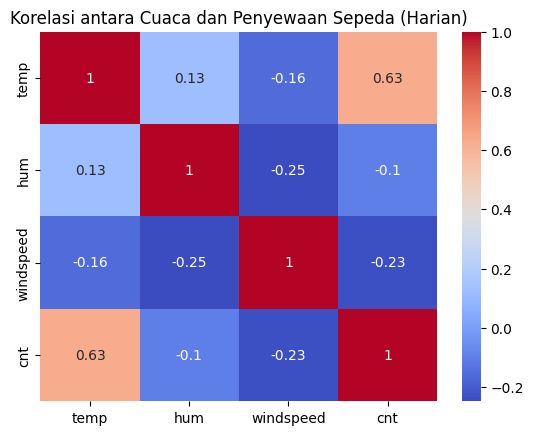

In [36]:
# Analisis korelasi pada dataset day.csv
correlation_day = cleanDay[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_day)

# Visualisasi korelasi dengan heatmap
sns.heatmap(correlation_day, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca dan Penyewaan Sepeda (Harian)')
plt.show()


               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


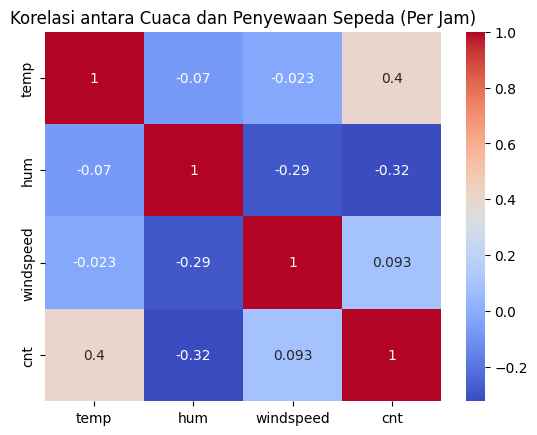

In [37]:
# Analisis korelasi pada dataset hour.csv
correlation_hour = cleanHour[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_hour)

# Visualisasi korelasi dengan heatmap
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca dan Penyewaan Sepeda (Per Jam)')
plt.show()


1. Suhu (temp):
 - Harian: Korelasi positif kuat (0.63), semakin tinggi suhu, semakin banyak penyewaan sepeda.
 - Per Jam: Korelasi lebih rendah (0.40), pengaruhnya lebih kecil dibandingkan harian.

2. Kelembaban (hum):
 - Harian: Korelasi lemah negatif (-0.10), sedikit memengaruhi penyewaan sepeda.
 - Per Jam: Korelasi lebih signifikan negatif (-0.32), kelembaban tinggi lebih terasa mengurangi penyewaan.

3. Kecepatan Angin (windspeed):
 - Harian: Korelasi negatif sedang (-0.23), angin lebih tinggi mengurangi penyewaan.
 - Per Jam: Pengaruh kecil (0.09), tidak signifikan pada skala jam.

- Apakah ada cuaca tertentu yang lebih menarik untuk penyewaan sepeda? Misalnya, apakah sepeda lebih banyak disewa pada cuaca cerah atau berkabut?



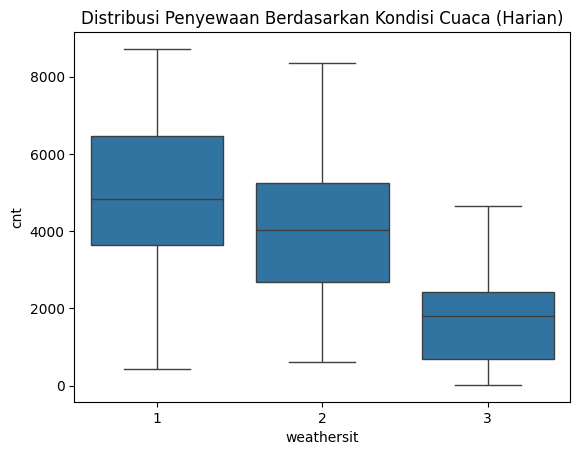

In [38]:
# Boxplot untuk melihat distribusi penyewaan sepeda berdasarkan kondisi cuaca di day.csv
sns.boxplot(x='weathersit', y='cnt', data=cleanDay)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca (Harian)')
plt.show()


1. Skala Harian (Day Dataset):
 - Cuaca Cerah: Penyewaan tertinggi (median sekitar 5000).
 - Mendung/Berawan: Penyewaan lebih rendah (median 4000), masih cukup baik.
 - Hujan: Penyewaan menurun drastis (median di bawah 2000).

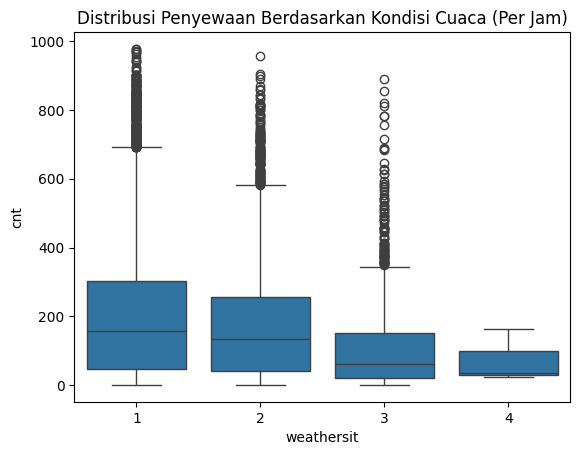

In [39]:
# Boxplot untuk melihat distribusi penyewaan sepeda berdasarkan kondisi cuaca di hour.csv
sns.boxplot(x='weathersit', y='cnt', data=cleanHour)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca (Per Jam)')
plt.show()


2. Skala Per Jam (Hour Dataset):
 - Cuaca Cerah: Penyewaan tertinggi (median di atas 200).
 - Mendung/Berawan: Penyewaan sedikit menurun (median di bawah 200).
 - Hujan: Penyewaan menurun signifikan (median sekitar 100).
 - Ekstrem: Hampir tidak ada penyewaan.

### Pertanyaan 2:

 - Perbandingan jumlah penyewaan sepeda pada hari kerja (working day) dan hari libur (holiday) serta akhir pekan. Apakah penyewaan lebih tinggi pada hari-hari tertentu?

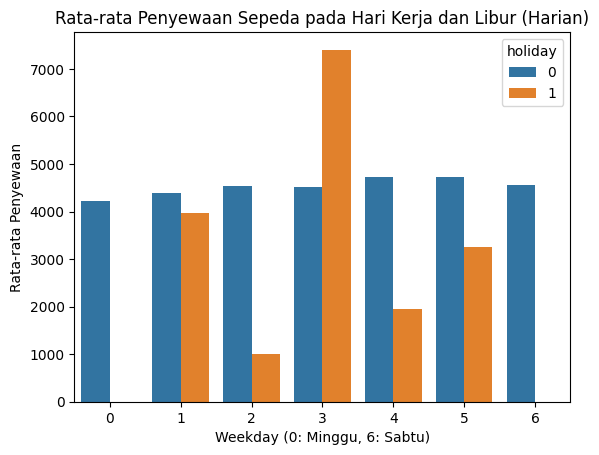

In [40]:
# Groupby berdasarkan hari kerja dan akhir pekan di day.csv
rentals_by_day = cleanDay.groupby(['holiday', 'weekday'])['cnt'].mean().reset_index()

# Visualisasi penyewaan pada hari kerja, akhir pekan, dan libur
sns.barplot(x='weekday', y='cnt', hue='holiday', data=rentals_by_day)
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja dan Libur (Harian)')
plt.xlabel('Weekday (0: Minggu, 6: Sabtu)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


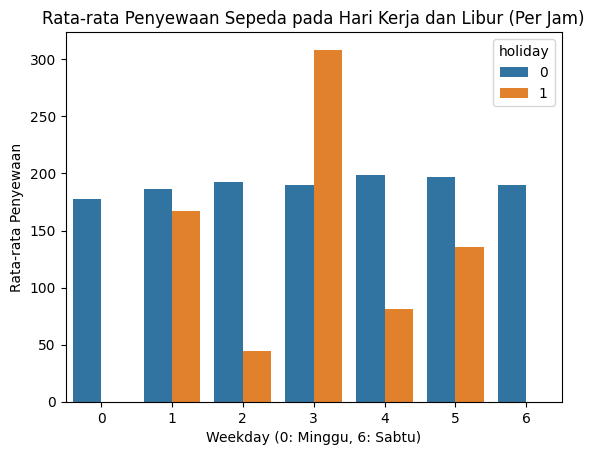

In [41]:
# Groupby berdasarkan hari kerja dan akhir pekan di hour.csv
rentals_by_hour = cleanHour.groupby(['holiday', 'weekday'])['cnt'].mean().reset_index()

# Visualisasi penyewaan pada hari kerja, akhir pekan, dan libur
sns.barplot(x='weekday', y='cnt', hue='holiday', data=rentals_by_hour)
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja dan Libur (Per Jam)')
plt.xlabel('Weekday (0: Minggu, 6: Sabtu)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


1. Skala Harian:
 - Hari Libur: Penyewaan tertinggi pada Rabu (weekday = 3).
 - Hari Kerja: Penyewaan stabil, tetapi lebih rendah daripada hari libur.

2. Skala Per Jam:
 - Hari Libur: Penyewaan per jam juga puncak pada Rabu (weekday = 3).
 - Hari Kerja: Penyewaan merata, dengan penurunan pada Sabtu (weekday = 5).

## Analisis Lanjutan (Opsional)

## Conclusion

**Conclution Pertanyaan 1**


1. Hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dan jumlah penyewaan sepeda. Apakah cuaca yang lebih panas atau lebih dingin mempengaruhi penurunan atau peningkatan penggunaan sepeda?
 - Suhu adalah faktor cuaca yang paling kuat memengaruhi penyewaan sepeda baik pada skala harian maupun per jam, dengan pengaruh yang lebih besar pada skala harian.
 - Kelembaban memiliki pengaruh yang lebih kuat pada skala per jam, dengan kecenderungan untuk mengurangi penyewaan sepeda lebih signifikan dalam waktu yang lebih singkat.
 - Kecepatan angin memiliki dampak moderat pada skala harian, namun pengaruhnya jauh lebih kecil pada skala per jam.

2. Apakah ada cuaca tertentu yang lebih menarik untuk penyewaan sepeda? Misalnya, apakah sepeda lebih banyak disewa pada cuaca cerah atau berkabut?
 - Cuaca Cerah merupakan kondisi cuaca yang paling menarik untuk penyewaan sepeda baik pada skala harian maupun per jam.
 - Cuaca Mendung atau Berawan mnmasih menarik tetapi kurang populer dibandingkan cuaca cerah.
 - Cuaca Hujan atau ekstrem sangat mengurangi jumlah penyewaan, terutama pada cuaca ekstrem yang hampir tidak ada penyewaan sepeda.


**Conclution Pertanyaan 2**
1. Perbandingan jumlah penyewaan sepeda pada hari kerja (working day) dan hari libur (holiday) serta akhir pekan. Apakah penyewaan lebih tinggi pada hari-hari tertentu?
- Penyewaan pada Hari Libur
 - Baik pada skala harian maupun per jam, penyewaan sepeda cenderung jauh lebih tinggi pada hari libur dibandingkan dengan hari kerja.

- Penyewaan pada Hari Kerja
 - Pada hari kerja, penyewaan sepeda cenderung lebih stabil dan terdistribusi merata sepanjang minggu, baik pada skala harian maupun per jam. Namun, rata-rata penyewaan tetap lebih rendah dibandingkan dengan hari libur.
